In [2]:
# This programme classifies images
!pip install keras
import matplotlib.pyplot as plt


In [3]:
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

Using TensorFlow backend.


170500096/170498071 [==============================] - 6s 0us/step


In [4]:
#print the datatypes of variables
print(type(x_train))
print(type(x_test))
print(type(y_train))
print(type(y_test))



<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [5]:
# all are numpy array format
# get the shapes
print('x_train shape:',x_train.shape)
print('x_test shape:',x_test.shape)
print('y_train shape:',y_train.shape)
print('y_test shape:',y_test.shape)

x_train shape: (50000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)
y_train shape: (50000, 1)
y_test shape: (10000, 1)


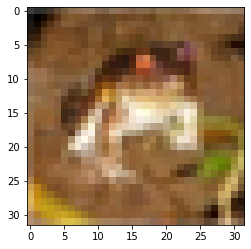

In [6]:
# 32 * 32 image with 3 depths as Red Green Blue
# 5000 rows and 1 column

# looking at first image in training dataset at location at index 0
def plot_image(index):
    image = x_train[index, :, :, :]
    plt.imshow(image)

plot_image(0)




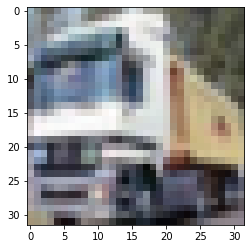

In [7]:
plot_image(1)

In [8]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

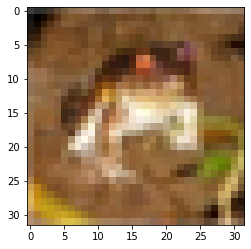

In [9]:
#show image as picture
import matplotlib.pyplot as plt
img =plt.imshow(x_train[0])

In [10]:
#print the label of image
print('The label is',y_train[0])

The label is [6]


In [11]:
# One-Hot - encoding : convert the labels into a set 10 numbers to input into the neural network
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

# print the new labels in the training dataset
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [12]:
#print an example of new labels
print('The one hot label is:',y_train_one_hot[0])


The one hot label is: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [0]:
# Normalize the pixels in images between 0 and 1 divide each by 255 its rule

x_train=x_train/255  
x_test=x_test/255


In [0]:
# now building convolutional neural network
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [15]:
# create the architecture
model= Sequential()

#convolutional layer
model.add( Conv2D(32, (5,5), activation='relu',input_shape=(32,32,3)))

# MaxPooling layer
model.add( MaxPooling2D(pool_size=(2,2)))
#Convolutional Layer
model.add( Conv2D(32, (5,5), activation='relu'))
# MaxPooling layer
model.add( MaxPooling2D(pool_size=(2,2)))  # reduces dimensions by half 32*32 converts into 16*16
# Flatten layer
model.add( Flatten() )

model.add( Dense(400, activation='relu')) # 400 neurons with relu activation function
model.add( Dense(10 , activation='softmax')) # last layer of CNN as 10 lables are present in dataset

In [0]:
# compile the model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy']) # for more than 2 lables use catrgorical_crossentropy

In [18]:
# train the model
hist = model.fit(x_train,y_train_one_hot,batch_size=256,epochs=10,validation_split=0.3)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 35000 samples, validate on 15000 samples
Epoch 1/10





35000/35000 [==============================] - 16s 455us/step - loss: 1.7640 - acc: 0.3614 - val_loss: 1.6332 - val_acc: 0.4127
Epoch 2/10
35000/35000 [==============================] - 2s 53us/step - loss: 1.4239 - acc: 0.4901 - val_loss: 1.3563 - val_acc: 0.5121
Epoch 3/10
35000/35000 [==============================] - 2s 52us/step - loss: 1.2704 - acc: 0.5487 - val_loss: 1.2538 - val_acc: 0.5557
Epoch 4/10
35000/35000 [==============================] - 2s 51us/step - loss: 1.1911 - acc: 0.5772 - val_loss: 1.2100 - val_acc: 0.5693
Epoch 5/10
35000/35000 [==============================] - 2s 52us/step - loss: 1.1180 - acc: 0.6069 - val_loss: 1.1475 - val_acc: 0.6009
Epoch 6/10
35000/35000 [==============================] - 2s 51us/step - loss: 1.0437 - acc: 0.6341 - val_loss: 1.1206 - val_acc: 0.6088
Epoch 7/10
35000/35000 [

In [19]:
# get the model accuracy
model.evaluate(x_test,y_test_one_hot)[1]

10000/10000 [==============================] - 1s 72us/step


0.6482

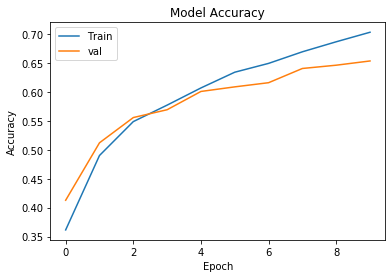

In [20]:
#visualize the model accuracy
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','val'],loc='upper left')

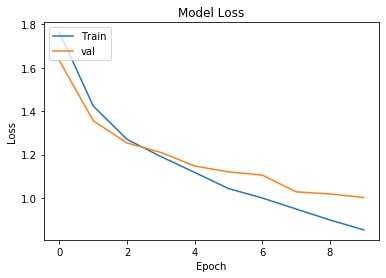

In [21]:
#visualize the model loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','val'],loc='upper left')

In [22]:
# Load the data
from google.colab import files
uploaded =files.upload()
my_image = plt.imread('puppy.jpg')

Saving puppy.jpg to puppy.jpg


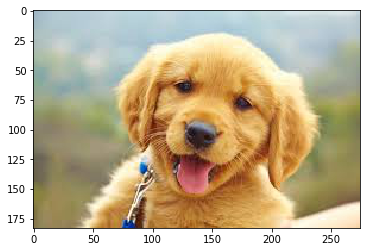

In [23]:
# show the uploaded image
img =plt.imshow(my_image)

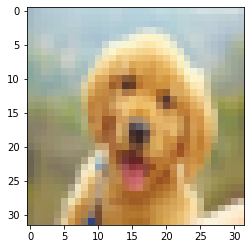

In [24]:
# resize the image to fit into the model
from skimage.transform import resize
my_image_resized = resize(my_image, (32,32,3))
img =plt.imshow(my_image_resized)

In [0]:
# get probalbilities for each class
import numpy as np
probabilities=model.predict(np.array ([my_image_resized,]))

In [26]:
#print probabilities
probabilities

array([[9.2974654e-04, 7.7055752e-08, 1.6353440e-01, 2.6006937e-02,
        1.4672778e-03, 7.9018742e-01, 9.2735076e-03, 8.3120055e-03,
        1.7658764e-04, 1.1205769e-04]], dtype=float32)

In [29]:

number_to_class = ['airplane','aotomobile','bird','cat','deer','dog','frog','horse','ship','truck']
index = np.argsort(probabilities[0,:])
print('Most likely class:',number_to_class[index[9]],'...probability:',probabilities[0,index[9]])
print('second likely class:',number_to_class[index[8]],'...probability:',probabilities[0,index[8]])
print('third likely class:',number_to_class[index[7]],'...probability:',probabilities[0,index[7]])
print('fourth likely class:',number_to_class[index[6]],'...probability:',probabilities[0,index[6]])
print('fifth likely class:',number_to_class[index[5]],'...probability:',probabilities[0,index[5]])



Most likely class: dog ...probability: 0.7901874
second likely class: bird ...probability: 0.1635344
third likely class: cat ...probability: 0.026006937
fourth likely class: frog ...probability: 0.009273508
fifth likely class: horse ...probability: 0.008312006


In [0]:
# the given image is dog correctly classified
model.save('my_model.h5')


In [0]:
from keras.models import load_model
model= load_model('my_model.h5')